This is similar to the 'NN' notebook, but will use pure tensorflow.

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

import numpy as np
import tensorflow as tf
sess = tf.InteractiveSession()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

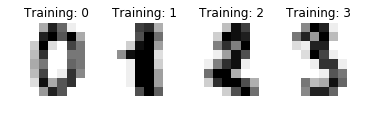

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [3]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
digits.target_cat = tf.one_hot(digits.target, 10)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train = data[:n_samples // 2].astype(np.float32)
X_test = data[n_samples // 2:].astype(np.float32)
y_train = digits.target_cat[:n_samples // 2]
y_test = digits.target_cat[n_samples // 2:]

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 64])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([64, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [5]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [6]:
tf.global_variables_initializer().run()
for _ in range(1000):
    indices = np.random.randint(X_train.shape[0], size=100)
    batch_xs = X_train[indices, :]
    batch_ys = sess.run(tf.gather(y_train, indices))
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [7]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: X_test, y_: y_test.eval()})) #.eval() converts from TF tensor to numpy array

0.935484
